<a href="https://colab.research.google.com/github/DonghaeSuh/NLP_Pytorch/blob/main/Model/BERT/BERT_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

In [ ]:
cd-

/content


In [ ]:
cd drive/MyDrive/Pytorch\ NLP/BERT/data_in

/content/drive/MyDrive/Pytorch NLP/BERT/data_in


In [ ]:
!git clone 'https://github.com/e9t/nsmc.git'

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Total 14763 (delta 0), reused 0 (delta 0), pack-reused 14763
Receiving objects: 100% (14763/14763), 56.19 MiB | 12.25 MiB/s, done.
Resolving deltas: 100% (1749/1749), done.
Updating files: 100% (14737/14737), done.


In [ ]:
cd nsmc

/content/drive/MyDrive/Pytorch NLP/BERT/data_in/nsmc


## 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
train_data=pd.read_csv('ratings_train.txt',delimiter='\t',header=0)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


## Tokenizer 별 길이 조사

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### 단순 길이 기준

In [ ]:
df=train_data['document'].astype(str).apply(lambda x: len(x))
df

0         19
1         33
2         17
3         29
4         61
          ..
149995    19
149996    13
149997    31
149998    27
149999    24
Name: document, Length: 150000, dtype: int64

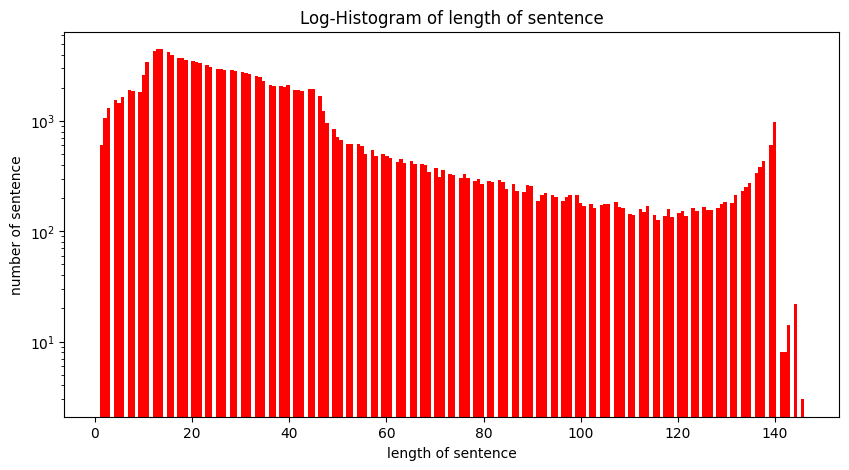

In [ ]:
# 히스토그램
plt.figure(figsize=(10,5))

plt.hist(df,bins=200,color='r',log=True)
plt.title('Log-Histogram of length of sentence')
plt.xlabel('length of sentence')
plt.ylabel('number of sentence')
plt.show()

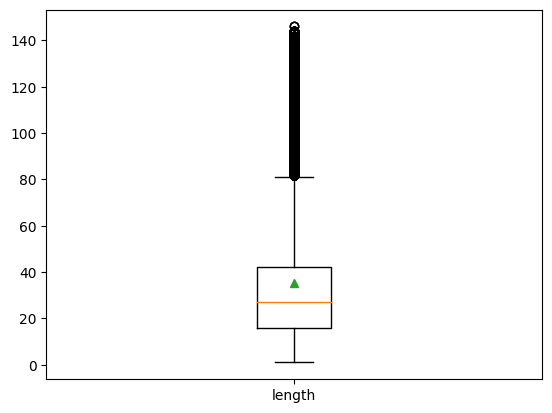

In [ ]:
# 박스플롯
plt.boxplot(df,labels=['length'],showmeans=True)
plt.show()

In [ ]:
# 통계값

print("최대 길이 : {}".format(np.max(df)))
print("최소 길이 : {}".format(np.min(df)))
print("평균 길이 : {:.2f}".format(np.mean(df)))
print("중간 길이 : {:.2f}".format(np.median(df)))
print("길이 표준편차 : {:.2f}".format(np.std(df)))
print("1사분위 길이 : {}".format(np.percentile(df,25)))
print("3사분위 길이 : {}".format(np.percentile(df,75)))

최대 길이 : 146
최소 길이 : 1
평균 길이 : 35.20
중간 길이 : 27.00
길이 표준편차 : 29.53
1사분위 길이 : 16.0
3사분위 길이 : 42.0


### 공백 기준

In [ ]:
df=train_data['document'].astype(str).apply(lambda x : len(x.split()))
df

0          5
1          4
2          1
3          6
4         11
          ..
149995     4
149996     3
149997     7
149998     6
149999     7
Name: document, Length: 150000, dtype: int64

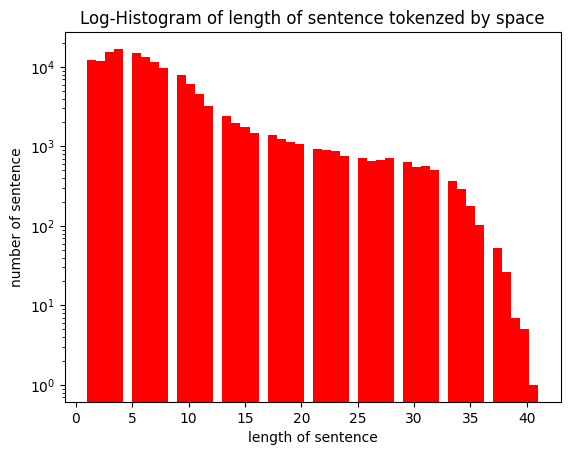

In [ ]:
plt.hist(df,bins=50,color='r',log=True)
plt.title("Log-Histogram of length of sentence tokenzed by space")
plt.xlabel("length of sentence")
plt.ylabel("number of sentence")
plt.show()

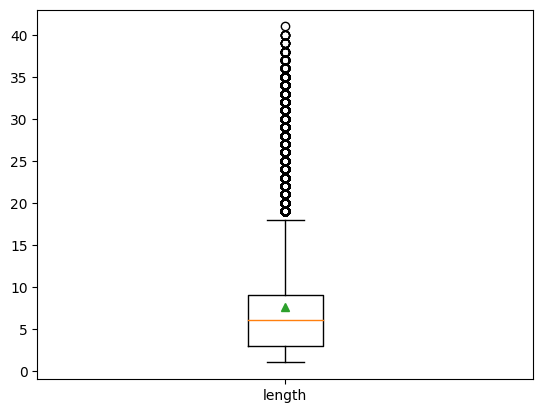

In [ ]:
plt.boxplot(df,labels=['length'],showmeans=True)
plt.show()

In [ ]:
print("최대 길이 : {}".format(np.max(df)))
print("최소 길이 : {}".format(np.min(df)))
print("평균 길이 : {:.2f}".format(np.mean(df)))
print("중간 길이 : {:.2f}".format(np.median(df)))
print("길이 표준편차 : {:.2f}".format(np.std(df)))
print("1사분위 길이 : {}".format(np.percentile(df,25)))
print("3사분위 길이 : {}".format(np.percentile(df,75)))

최대 길이 : 41
최소 길이 : 1
평균 길이 : 7.58
중간 길이 : 6.00
길이 표준편차 : 6.51
1사분위 길이 : 3.0
3사분위 길이 : 9.0


### BERT Tokenizer 기준 (WordPiece)

In [ ]:
!git clone 'https://github.com/huggingface/transformers'

Cloning into 'transformers'...
remote: Enumerating objects: 144752, done.
remote: Counting objects: 100% (996/996), done.
remote: Compressing objects: 100% (582/582), done.
remote: Total 144752 (delta 518), reused 712 (delta 344), pack-reused 143756
Receiving objects: 100% (144752/144752), 148.21 MiB | 15.80 MiB/s, done.
Resolving deltas: 100% (107111/107111), done.


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.7 MB/s eta 0:00:00


In [ ]:
from transformers import *

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attentio

In [ ]:
tokenizer=BertTokenizer.from_pretrained('bert-base-multilingual-cased')

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/tokenizer_config.json


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.30.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size":

In [ ]:
tokenizer('안녕 나는 사람이야')

{'input_ids': [101, 9521, 118741, 100585, 97802, 21711, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer.encode('안녕 나는 사람이야')

[101, 9521, 118741, 100585, 97802, 21711, 102]

In [ ]:
df=train_data['document'].astype(str).apply(lambda x: len(tokenizer.encode(x)))
df

0         17
1         31
2          3
3         23
4         47
          ..
149995    17
149996    13
149997    23
149998    20
149999    13
Name: document, Length: 150000, dtype: int64

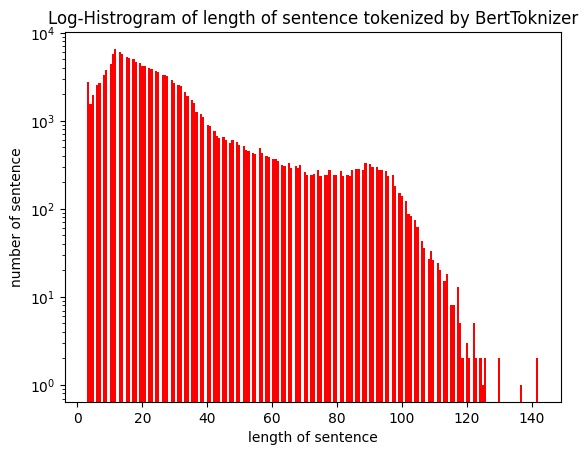

In [ ]:
plt.hist(df,bins=200,color='r',log=True)
plt.title("Log-Histrogram of length of sentence tokenized by BertToknizer")
plt.xlabel("length of sentence")
plt.ylabel("number of sentence")
plt.show()

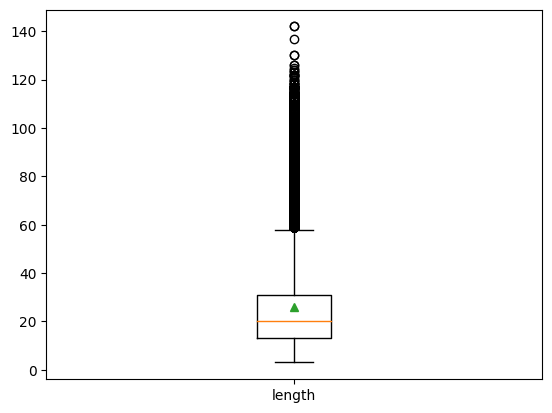

In [ ]:
plt.boxplot(df,labels=['length'],showmeans=True)
plt.show()

In [ ]:
# 통계값

print("최대 길이 : {}".format(np.max(df)))
print("최소 길이 : {}".format(np.min(df)))
print("평균 길이 : {:.2f}".format(np.mean(df)))
print("중간 길이 : {:.2f}".format(np.median(df)))
print("길이 표준편차 : {:.2f}".format(np.std(df)))
print("1사분위 길이 : {}".format(np.percentile(df,25)))
print("3사분위 길이 : {}".format(np.percentile(df,75))) # 3사 분위에서 좀 더 간 39를 max_len으로 취한다

최대 길이 : 142
최소 길이 : 3
평균 길이 : 25.93
중간 길이 : 20.00
길이 표준편차 : 19.97
1사분위 길이 : 13.0
3사분위 길이 : 31.0


## 라벨 비율 확인

In [ ]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

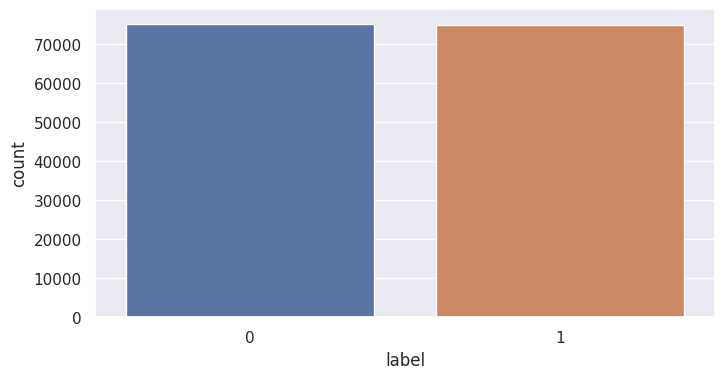

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(data=train_data,x=train_data['label'])

## 특수 문자 확인

In [ ]:
train_data['document'].astype(str).apply(lambda x : '.' in x).mean()

0.5176333333333333

In [ ]:
print('마침표 포함 문장 : {:.2f}%'.format(train_data['document'].astype(str).apply(lambda x : '.' in x).mean()*100))
print('물음표 포함 문장 : {:.2f}%'.format(train_data['document'].astype(str).apply(lambda x : '?' in x).mean()*100))

마침표 포함 문장 : 51.76%
물음표 포함 문장 : 8.25%


# 전처리

In [1]:
ls

drive/  sample_data/


In [ ]:
import pandas as pd
train_data=pd.read_csv('ratings_train.txt',delimiter='\t',header=0)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
test_data=pd.read_csv('ratings_test.txt',delimiter='\t',header=0)
test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
cd-

/content/drive/MyDrive/Pytorch NLP/BERT/data_in/nsmc


In [ ]:
cd ..

/content/drive/MyDrive/Pytorch NLP/BERT/data_in


In [ ]:
# 특수문자 제거 및 id column 제거 정도만 해줄 것이다
train_data['document']=train_data['document'].str.replace('[^ a-zA-Z0-9가-힣]',"")
train_data.to_csv("train_df.csv",columns=['document','label'],index=False)

<ipython-input-54-fac89e6c4df5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document']=train_data['document'].str.replace('[^ a-zA-Z0-9가-힣]',"")


In [ ]:
train_df=pd.read_csv('train_df.csv')
train_df

,document,label
0,아 더빙 진짜 짜증나네요 목소리,0
1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
...,...,...
149995,인간이 문제지 소는 뭔죄인가,0
149996,평점이 너무 낮아서,1
149997,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0
149998,청춘 영화의 최고봉방황과 우울했던 날들의 자화상,1


In [ ]:
test_data['document']=test_data['document'].str.replace('[^ a-zA-Z0-9가-힣]',"")
test_data.to_csv("test_df.csv",columns=['document','label'],index=False)

<ipython-input-56-cf2c1217d851>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document']=test_data['document'].str.replace('[^ a-zA-Z0-9가-힣]',"")


In [ ]:
test_df=pd.read_csv('test_df.csv')
test_df

,document,label
0,굳,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,3D만 아니었어도 별 다섯 개 줬을텐데 왜 3D로 나와서 제 심기를 불편하게 하죠,0
...,...,...
49995,오랜만에 평점 로긴했네 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


# 구현

## 데이터 불러오기 및 Dataset,DataLoader 마련

1. tokenizer의 encode_plus를 이용해 BertModel의 input으로 사용할 3가지 input을 torch.Tensor형태로 마련
2. 이를 가지고, dataset 마련
3. dataset을 가지고, dataloader 마련

### 데이터 불러오기

In [21]:
ls

config.json@  tokenizer_config.json@  vocab.txt@


In [27]:
cd drive/MyDrive/Pytorch NLP/BERT

/content/drive/MyDrive/Pytorch NLP/BERT


In [28]:
import pandas as pd

In [29]:
train_df=pd.read_csv('data_in/train_df.csv')
train_df=train_df.dropna()
train_df

,document,label
0,아 더빙 진짜 짜증나네요 목소리,0
1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
...,...,...
149995,인간이 문제지 소는 뭔죄인가,0
149996,평점이 너무 낮아서,1
149997,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0
149998,청춘 영화의 최고봉방황과 우울했던 날들의 자화상,1


In [30]:
test_df=pd.read_csv('data_in/test_df.csv')
test_df=test_df.dropna()
test_df

,document,label
0,굳,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,3D만 아니었어도 별 다섯 개 줬을텐데 왜 3D로 나와서 제 심기를 불편하게 하죠,0
...,...,...
49995,오랜만에 평점 로긴했네 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


### Tokenizer 준비

In [ ]:
!git clone 'https://github.com/huggingface/transformers'

Cloning into 'transformers'...
remote: Enumerating objects: 144707, done.
remote: Counting objects: 100% (986/986), done.
remote: Compressing objects: 100% (524/524), done.
remote: Total 144707 (delta 516), reused 784 (delta 397), pack-reused 143721
Receiving objects: 100% (144707/144707), 148.21 MiB | 13.39 MiB/s, done.
Resolving deltas: 100% (107029/107029), done.
Updating files: 100% (3363/3363), done.


In [4]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.1 MB/s eta 0:00:00


In [5]:
from transformers import *

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attentio

In [11]:
# tokenizer 준비
tokenizer=BertTokenizer.from_pretrained('bert-base-multilingual-cased')

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/tokenizer_config.json


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.30.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size":

In [ ]:
with open('/root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/vocab.txt',mode='r') as file:
  print(file.readlines())

['[PAD]\n', '[unused1]\n', '[unused2]\n', '[unused3]\n', '[unused4]\n', '[unused5]\n', '[unused6]\n', '[unused7]\n', '[unused8]\n', '[unused9]\n', '[unused10]\n', '[unused11]\n', '[unused12]\n', '[unused13]\n', '[unused14]\n', '[unused15]\n', '[unused16]\n', '[unused17]\n', '[unused18]\n', '[unused19]\n', '[unused20]\n', '[unused21]\n', '[unused22]\n', '[unused23]\n', '[unused24]\n', '[unused25]\n', '[unused26]\n', '[unused27]\n', '[unused28]\n', '[unused29]\n', '[unused30]\n', '[unused31]\n', '[unused32]\n', '[unused33]\n', '[unused34]\n', '[unused35]\n', '[unused36]\n', '[unused37]\n', '[unused38]\n', '[unused39]\n', '[unused40]\n', '[unused41]\n', '[unused42]\n', '[unused43]\n', '[unused44]\n', '[unused45]\n', '[unused46]\n', '[unused47]\n', '[unused48]\n', '[unused49]\n', '[unused50]\n', '[unused51]\n', '[unused52]\n', '[unused53]\n', '[unused54]\n', '[unused55]\n', '[unused56]\n', '[unused57]\n', '[unused58]\n', '[unused59]\n', '[unused60]\n', '[unused61]\n', '[unused62]\n', '[unu

In [12]:
cd

/root


In [13]:
cd .cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba

/root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba


In [15]:
ls

config.json@  tokenizer_config.json@  vocab.txt@


In [ ]:
import json

In [ ]:
with open('config.json',mode='r') as f:
  f=json.load(f)
  print(f)

{'architectures': ['BertForMaskedLM'], 'attention_probs_dropout_prob': 0.1, 'directionality': 'bidi', 'hidden_act': 'gelu', 'hidden_dropout_prob': 0.1, 'hidden_size': 768, 'initializer_range': 0.02, 'intermediate_size': 3072, 'layer_norm_eps': 1e-12, 'max_position_embeddings': 512, 'model_type': 'bert', 'num_attention_heads': 12, 'num_hidden_layers': 12, 'pad_token_id': 0, 'pooler_fc_size': 768, 'pooler_num_attention_heads': 12, 'pooler_num_fc_layers': 3, 'pooler_size_per_head': 128, 'pooler_type': 'first_token_transform', 'type_vocab_size': 2, 'vocab_size': 119547}


In [ ]:
with open('tokenizer_config.json',mode='r') as f:
  f=json.load(f)
  print(f)

{'do_lower_case': False}


### Dataset

In [16]:
import torch

In [17]:
# hyperparameters
'''
import random
import torch

random.seed(123)
torch.manual_seed(123)
'''

MAX_LEN=39
VALID_SPLIT = 0.2
BATCH_SIZE=32

In [18]:
# 텍스트 분류를 위한 한개의 sentence만을 받는 tokenizer
def bert_tokenizer(text,MAX_LEN):
  encoded_dict=tokenizer.encode_plus(text=text,
                                  add_special_tokens=True, # add [CLS],[SEP] tokens
                                  max_length=MAX_LEN,
                                  padding='max_length',
                                  truncation=True,
                                  return_attention_mask=True
                                  )
  return encoded_dict['input_ids'],encoded_dict['attention_mask'],encoded_dict['token_type_ids']

In [76]:
bert_tokenizer('안녕 나는 사람이야',10)

([101, 9521, 118741, 100585, 97802, 21711, 102, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
import tqdm

In [31]:
train_input_ids=[]
train_attention_masks=[]
train_token_type_ids=[]
train_label=[]

for text,label in tqdm.tqdm(zip(train_df['document'],train_df['label']),total=len(train_df)):
  input_id,attn_mask,token_type_id = bert_tokenizer(text,MAX_LEN)

  train_input_ids.append(input_id)
  train_attention_masks.append(attn_mask)
  train_token_type_ids.append(token_type_id)
  train_label.append(label)

train_input_ids=torch.LongTensor(train_input_ids)
train_attention_masks = torch.LongTensor(train_attention_masks)
train_token_type_ids = torch.LongTensor(train_token_type_ids)
train_label = torch.LongTensor(train_label)

100%|██████████| 149391/149391 [00:59<00:00, 2524.68it/s]


In [32]:
train_input=(train_input_ids,train_attention_masks,train_token_type_ids)

In [33]:
test_input_ids=[]
test_attention_masks=[]
test_token_type_ids=[]
test_label=[]

for text,label in tqdm.tqdm(zip(test_df['document'],test_df['label']),total=len(test_df)):
  input_id,attn_mask,token_type_id = bert_tokenizer(text,MAX_LEN)

  test_input_ids.append(input_id)
  test_attention_masks.append(attn_mask)
  test_token_type_ids.append(token_type_id)
  test_label.append(label)

test_input_ids=torch.LongTensor(test_input_ids)
test_attention_masks = torch.LongTensor(test_attention_masks)
test_token_type_ids = torch.LongTensor(test_token_type_ids)
test_label = torch.LongTensor(test_label)

100%|██████████| 49786/49786 [00:22<00:00, 2171.34it/s]


In [34]:
test_input=(test_input_ids,test_attention_masks,test_token_type_ids)

In [77]:
from torch.utils.data import Dataset,DataLoader,random_split

In [90]:
class Custom_dataset(Dataset):
  def __init__(self,input,label):
    self.input_ids,self.attn_mask,self.token_type_ids=input
    self.label=label

  def __getitem__(self, index):
    input= { 'input_ids':self.input_ids[index],'attention_masks':self.attn_mask[index],'token_type_ids':self.token_type_ids[index], 'labels':self.label[index]}

    return input

  def __len__(self):
    return self.label.size()[0]

In [66]:
train_dataset=Custom_dataset(train_input,train_label)
test_dataset=Custom_dataset(test_input,test_label)

In [78]:
generator = torch.Generator().manual_seed(42)
train_dataset,val_dataset=random_split(train_dataset,[1-VALID_SPLIT,VALID_SPLIT],generator=generator)

In [79]:
len(train_dataset)

119513

In [80]:
len(val_dataset)

29878

### DataLoader

In [135]:
train_iter=DataLoader(train_dataset,batch_size=BATCH_SIZE)
val_iter=DataLoader(val_dataset,batch_size=BATCH_SIZE)
test_iter=DataLoader(test_dataset,batch_size=1024)

In [68]:
next(iter(train_iter))['input_ids'].size()

torch.Size([32, 39])

In [69]:
next(iter(train_iter))['attention_masks'].size()

torch.Size([32, 39])

In [70]:
next(iter(train_iter))['token_type_ids'].size()

torch.Size([32, 39])

In [71]:
next(iter(train_iter))['labels'].size()

torch.Size([32])

In [72]:
train_iter=DataLoader(train_dataset,batch_size=BATCH_SIZE)
test_iter=DataLoader(test_dataset,batch_size=BATCH_SIZE)

# 모델 구현

In [14]:
import torch.nn as nn

In [83]:
class BertClassificationModel(nn.Module):
  def __init__(self,model_name,num_class,cache_dir):
    super(BertClassificationModel,self).__init__()

    self.bert=BertModel.from_pretrained(model_name,cache_dir=cache_dir)
    self.dropout=nn.Dropout(self.bert.config.hidden_dropout_prob)
    self.dense=nn.Linear(self.bert.config.hidden_size,num_class)
    nn.init.trunc_normal_(self.dense.weight.data)

  def forward(self,input,attention_masks=None,token_type_ids=None):

    # input : (batch_size, max_len)
    # attention_mask : (batch_size, max_len)
    # token_type_ids : (batch_size, max_len)

    outputs=self.bert(input,attention_masks,token_type_ids)
    # outputs : (batch_size, max_len, hidden_dim) / (batch_size, hidden_dim) <- CLS's last hidden state vector
    pooled_outputs = self.dropout(outputs[1]) # (batch_size, hidden_dim)
    logits=self.dense(pooled_outputs) # (batch_size, num_class)

    return logits # (batch_size, num_class)

#Train

In [127]:
# hyperparameters
MAX_LEN=39
VALID_SPLIT = 0.2
BATCH_SIZE=32
EPOCH=10

device='gpu' if torch.cuda.is_available() else 'cpu'

### Compile

In [85]:
cd

/root


In [92]:
model=BertClassificationModel('bert-base-multilingual-cased',2,'.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba').to(device)
optimizer=torch.optim.Adam(model.parameters(),3e-5)
criterion=nn.CrossEntropyLoss()

loading configuration file config.json from cache at .cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.30.2",
  "type_vocab_size": 2,
  "us

### Training

In [131]:
def train(model,optimizer,criterion,train_iter):
  model.train()

  for batch in tqdm.tqdm(train_iter,desc='training'):
    x1=batch['input_ids'].to(device)
    x2=batch['attention_masks'].to(device)
    x3=batch['token_type_ids'].to(device)
    y=batch['labels'].to(device)

    outputs = model(x1,x2,x3)
    loss = criterion(outputs,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [136]:
def evaluation(model,criterion,val_iter):
  model.eval()

  total_loss=0
  total_acc=0

  for batch in tqdm.tqdm(val_iter,desc='evaluation'):
    x1=batch['input_ids'].to(device)
    x2=batch['attention_masks'].to(device)
    x3=batch['token_type_ids'].to(device)
    y=batch['labels'].to(device)

    outputs=model(x1,x2,x3)
    loss = criterion(outputs,y)
    total_loss+=loss

    total_acc+=((outputs.max(1)[1]==y).sum().item())/y.size()[0]

  avg_loss=total_loss/len(val_iter)
  avg_acc=total_acc/len(val_iter)

  return avg_loss,avg_acc

In [117]:
# TEST
a=torch.Tensor([[0,1],[1,0],[0,1]])
b=torch.LongTensor([0,0,0])

criterion(a,b)
(a.max(1)[1]==b).sum().item()

1

In [124]:
cd /content/drive/MyDrive/Pytorch NLP/BERT

/content/drive/MyDrive/Pytorch NLP/BERT


In [128]:
ls

BERT_Text_Classification.ipynb  data_in/  data_out/  transformers/


In [129]:
cd data_out

/content/drive/MyDrive/Pytorch NLP/BERT/data_out


In [133]:
ls

In [126]:
import os

In [134]:
best_val_loss=None

for e in range(EPOCH):
  train(model,optimizer,criterion,train_iter)
  val_loss,val_acc=evaluation(model,criterion,val_iter)

  print("Epoch : {} | val_loss : {:5.2f} , val_accuracy : {:5.2f}".format(e+1,val_loss.item(),val_acc.item()))

  if not best_val_loss or bset_val_loss>val_loss:
    os.makedirs('best_weight',exist_ok=True)
    torch.save(model.state_dict(),'./best_weight/bert_cls_best_weight.pt')
    best_val_loss=val_loss

training:   0%|          | 2/3735 [00:27<14:26:24, 13.93s/it]


KeyboardInterrupt: ignored

# TEST

In [ ]:
model=torch.load_state_dict(torch.load('./best_weight/bert_cls_best_weight.pt'))
test_loss,test_acc=model.evaluation(model,criterion,test_iter)
print("test loss : {} | test acc : {}".format(test_loss,test_acc))